## Ensemble 

We're going to use Hard voting classifier as ensemble of all the individual models that we've built so far.

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
# from skelm import ELMClassifier as elm
from skelm import ELMClassifier
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 71) (1999,)
(857, 71) (857,)


## Ensemble - Voting Classifier

In [5]:
# Define all classifiers with best parameters

lin_clf = SGDClassifier(loss = 'hinge', max_iter = 100, penalty = 'l2', random_state = 222)
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 9, p = 1)
RF = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)
DT = tree.DecisionTreeClassifier(random_state = 222, min_samples_split = 4, max_depth = 23, criterion = 'gini')

ELM = ELMClassifier(n_neurons = 500, ufunc = 'relu', random_state = 222, alpha = 0.0001)
SVC = SVC(C = 50, degree = 2, kernel = 'poly', random_state = 222)
MLP = MLPClassifier(solver = 'adam', learning_rate = 'constant', hidden_layer_sizes = (1000,), alpha = 0.0001,
      activation = 'logistic', random_state = 222)


In [6]:
# Create an ensemble model using voting
ens_model = VotingClassifier(estimators=[('lin_clf', lin_clf), ('KNN', KNN),
                                       ('RF', RF),('DT', DT),
                                       ('ELM', ELM),
                                       ('SVC', SVC), ('MLP', MLP)], voting = 'hard')

In [7]:
# Train the ensemble model on the training data
ens_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lin_clf',
                              SGDClassifier(max_iter=100, random_state=222)),
                             ('KNN', KNeighborsClassifier(n_neighbors=9, p=1)),
                             ('RF',
                              RandomForestClassifier(max_depth=60,
                                                     n_estimators=290,
                                                     random_state=222)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=23,
                                                     min_samples_split=4,
                                                     random_state=222)),
                             ('ELM',
                              ELMClassifier(alpha=0.0001, n_neurons=500,
                                            random_state=222, ufunc='relu')),
                             ('SVC',
                              SVC(C=50, degree=2, kernel='poly',
              

In [8]:
# train & test accuracies 

y_pred_train = ens_model.predict(x_train)
y_pred_test = ens_model.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.9556592765460911


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       0.94      1.00      0.97        17
         3.0       0.93      1.00      0.97        14
         4.0       1.00      0.94      0.97        18
         5.0       1.00      0.94      0.97        16
         6.0       1.00      1.00      1.00        15
         7.0       0.88      1.00      0.94        15
         8.0       0.96      1.00      0.98        23
         9.0       0.92      1.00      0.96        11
        10.0       1.00      0.88      0.93        16
        11.0       1.00      1.00      1.00        15
        12.0       1.00      1.00      1.00        16
        13.0       0.93      1.00      0.96        13
        14.0       0.89      1.00      0.94        17
        15.0       1.00      1.00      1.00        17
        16.0       0.88      1.00      0.94        15
        17.0       0.82      1.00      0.90        14
        18.0       0.94    

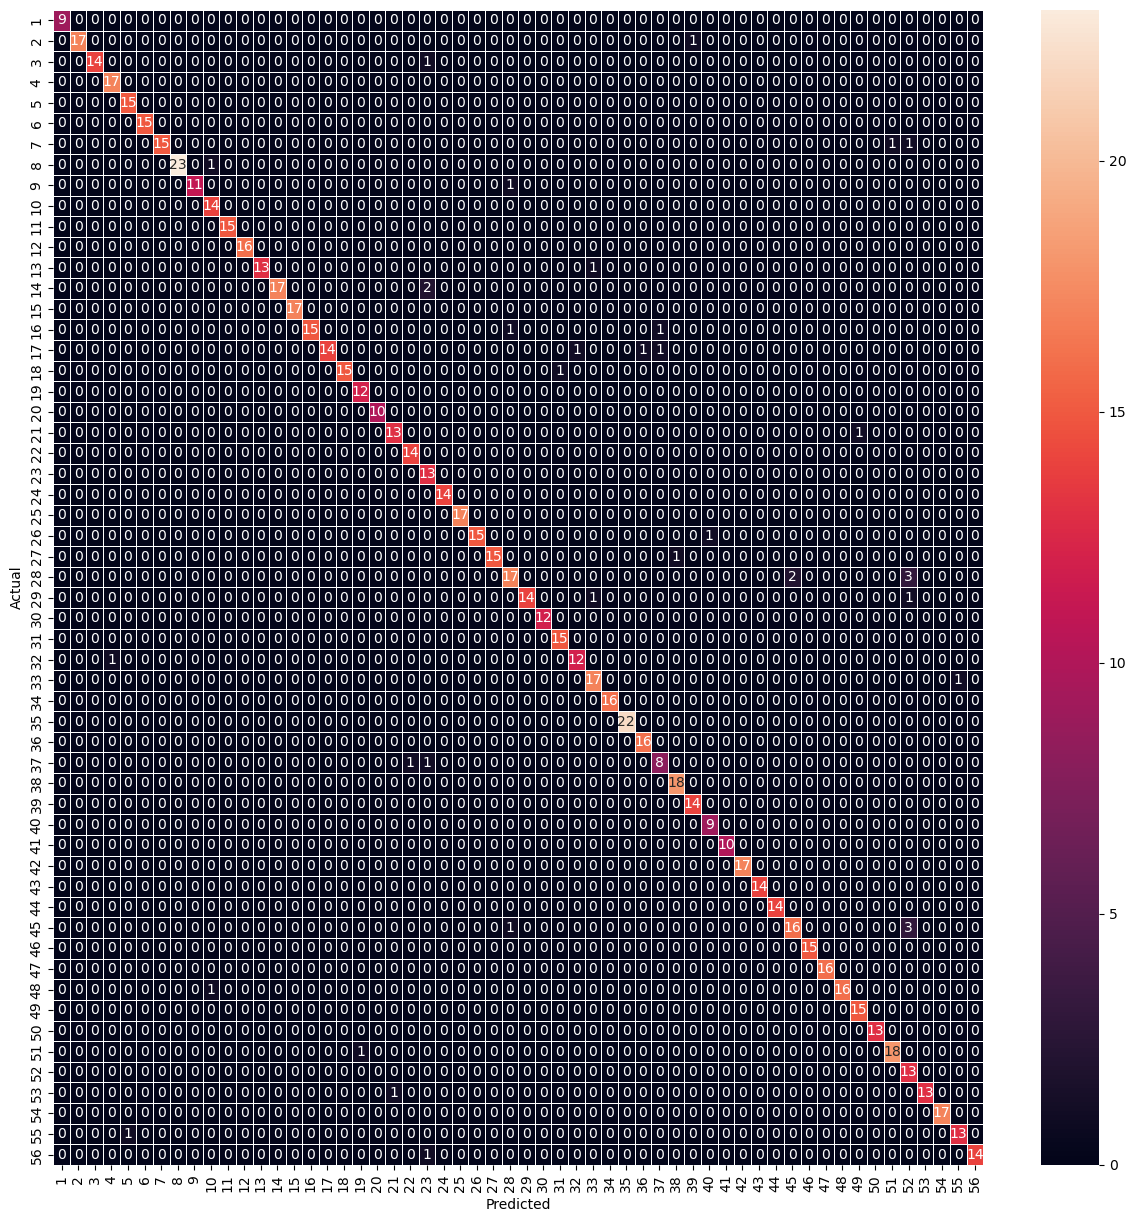

In [9]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification report

print(classification_report(y_test, y_pred_test))

### Comparision of accuracy scores of individual models vs Ensemble on the test data.

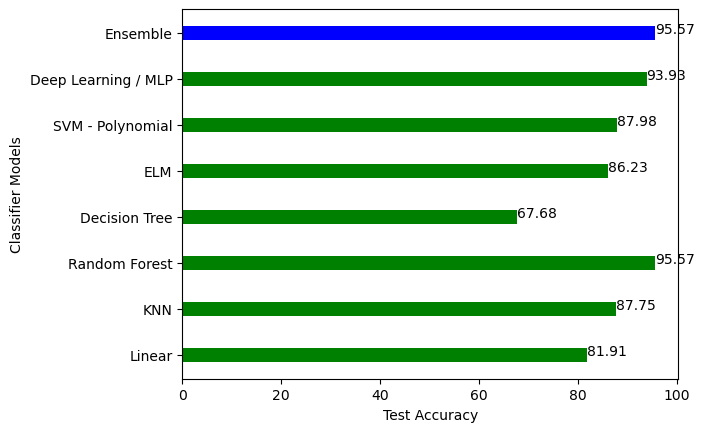

In [10]:
clf_list = [lin_clf, KNN, RF, DT, ELM, SVC, MLP, ens_model]
ax = ['Linear', 'KNN', 'Random Forest', 'Decision Tree', 'ELM', 'SVM - Polynomial', 'Deep Learning / MLP', 'Ensemble']
ay = []
for clf in clf_list:
    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    test_acc = accuracy_score(pred_test, y_test)
    ay.append(round(test_acc*100, 2))
    
plt.barh(ax, ay, color = ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'b'], height = 0.3)
for index, value in enumerate(ay):
    plt.text(value, index, str(value))
plt.xlabel('Test Accuracy')
plt.ylabel('Classifier Models')
plt.show()